In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Dataset

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#to display stats about the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#to display the basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Preprocessing the dataset

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory data Analysis

<AxesSubplot:>

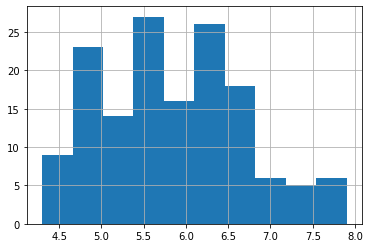

In [11]:
df['sepal_length'].hist()

<AxesSubplot:>

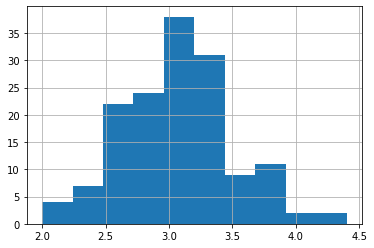

In [12]:
df['sepal_width'].hist()

<AxesSubplot:>

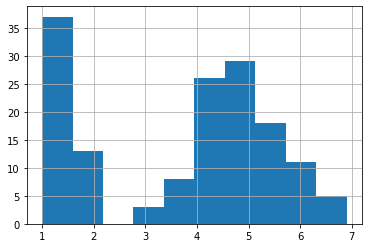

In [13]:
df['petal_length'].hist()

<AxesSubplot:>

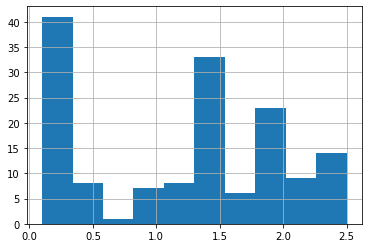

In [14]:
df['petal_width'].hist()

In [16]:
#scatter plot
colors =['orchid','red','green']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

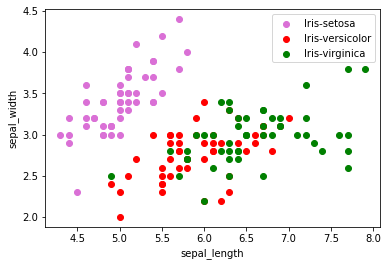

In [18]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

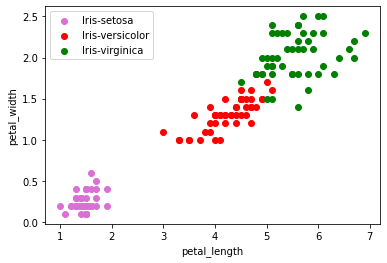

In [19]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

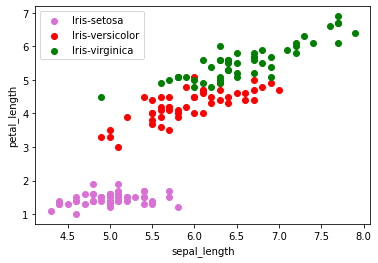

In [20]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()

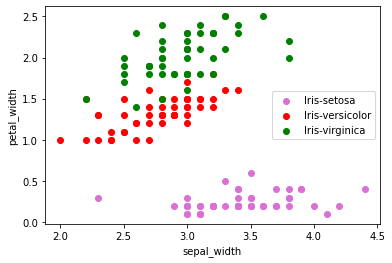

In [21]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()

# Coorelation Matrix

In [22]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

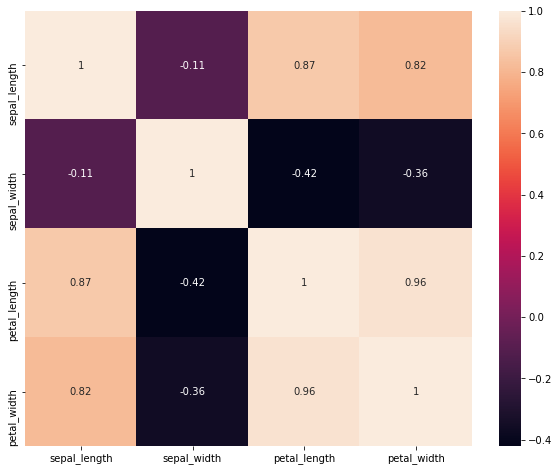

In [31]:
corr = df.corr()
fig, lb = plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True,ax=lb)

<AxesSubplot:>

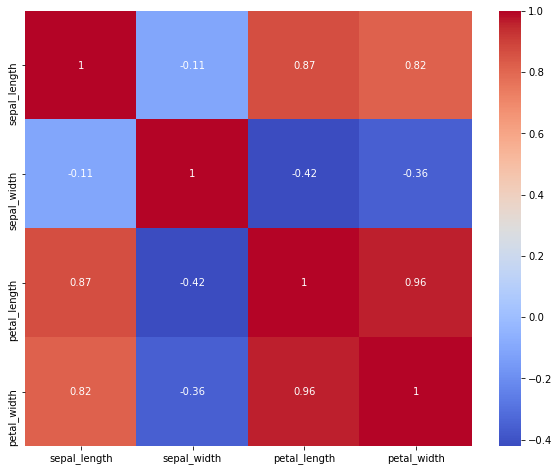

In [30]:
corr = df.corr()
fig, lb = plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True,ax=lb,cmap='coolwarm')

# Label Encoder

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [34]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species'])
Y = df['species']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [37]:
model.fit(X_train,Y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
print("Accuracy : ", model.score(X_test,Y_test)*100)

Accuracy :  97.77777777777777


In [39]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [41]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [42]:
print("Accuracy : ",model.score(X_test,Y_test)*100)

Accuracy :  95.55555555555556


In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [44]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [45]:
print("Accuracy : ",model.score(X_test,Y_test)*100)

Accuracy :  95.55555555555556
